# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json 
import seaborn as sns

In [2]:
#Read CSV file 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [4]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'nRJpTybxS8bUO1mkICc5CcNP1'
consumer_secret = 'FUpqAUJlgorMdGD0tZQNtU4nmIxWOhGkX8AwgWxlJJ4lVUwfg2'
access_token = '2264282049-zsVh2GBKbZXKd1H9IjJDJrP9NFECH0WKaXIiB6H'
access_secret = 'mXCFvLNtmExXsh8VLwAnpYXAe0Pi50SlqHASo1I4gsjDY'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257


AttributeError: module 'tweepy' has no attribute 'TweepException'

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
tweet_json =  pd.read_json('tweet-json.txt', lines=True )

In [6]:
tweet_json = tweet_json[['id', 'favorite_count', 'retweet_count']]

In [7]:
twitter_archive.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
image_prediction.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
tweet_json.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              19 non-null     int64
 1   favorite_count  19 non-null     int64
 2   retweet_count   19 non-null     int64
dtypes: int64(3)
memory usage: 584.0 bytes


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [10]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
tweet_json.head()

,id,favorite_count,retweet_count
0,892420643555336193,33651,6959
1,892177421306343426,29179,5263
2,891815181378084864,21946,3463
3,891689557279858688,36734,7182
4,891327558926688256,35098,7707


In [13]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [13]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [14]:
twitter_archive['name'].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
           ... 
Kaiya         1
Heinrich      1
Frönq         1
Eriq          1
Evy           1
Name: name, Length: 957, dtype: int64

In [15]:
twitter_archive.tweet_id.duplicated().sum()

0

In [16]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1276,750071704093859840,https://pbs.twimg.com/media/CmjKOzVWcAAQN6w.jpg,2,redbone,0.382113,True,malinois,0.249943,True,miniature_pinscher,0.070926,True
930,703041949650034688,https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg,1,hippopotamus,0.581403,False,doormat,0.152445,False,sea_lion,0.026364,False
931,703079050210877440,https://pbs.twimg.com/media/CcHWqQCW8AEb0ZH.jpg,2,Pembroke,0.778503,True,Shetland_sheepdog,0.093834,True,Cardigan,0.060296,True
1340,758740312047005698,https://pbs.twimg.com/media/CoeWSJcUIAAv3Bq.jpg,1,Chesapeake_Bay_retriever,0.848514,True,Labrador_retriever,0.110054,True,curly-coated_retriever,0.025201,True
1234,746369468511756288,https://pbs.twimg.com/media/ClujESVXEAA4uH8.jpg,1,German_shepherd,0.622957,True,malinois,0.338884,True,wallaby,0.024161,False


In [18]:
image_prediction.jpg_url.duplicated().sum()

66

In [19]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
tweet_json.head(5)

,id,favorite_count,retweet_count
0,892420643555336193,33632,6959
1,892177421306343426,29179,5263
2,891815181378084864,21954,3463
3,891689557279858688,36735,7182
4,891327558926688256,35099,7707


In [20]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              19 non-null     int64
 1   favorite_count  19 non-null     int64
 2   retweet_count   19 non-null     int64
dtypes: int64(3)
memory usage: 584.0 bytes


### Quality issues
1. For Twitter_ archives ,Columns with retweets information - retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp contain in total 181 values non-null.

2. There are duplicates in image predictions. Drop duplicates.

3. For Twitter_ archives, tweet_id should be a string

4. Incorrect datatypes of "timestamp", "rating_numerator", "rating_denomerator".

5. We can see that all names in lowercase are incorrect. There are also dogs with names ending in "None." We can locate a name in a text column for a number of these rows. Whenever you can, extract names from text while excluding others.

6. fix some of the ratings columns

7. Remove HTML tags from source and make it more readable.

8. We can notice that some of the values are lowercase and some of them uppercase. Names also have '' separator. Capitalise all the breeds and replace '' character with space.
9. In several columns null objects are non-null (None to NaN).

In [21]:
twitter_archive2 = twitter_archive.copy()
image_prediction2 = image_prediction.copy()
tweet_json2 = tweet_json.copy()


### Tidiness issues
1. For each stage, a separate column is present. They should be combined to form one.

2. The archive table should be combined with the image prediction data.



## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [22]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()


### Quality Issue 1: Retweets with null values

#### Define:

#### Code

In [23]:
# Filter out all retweeted status id
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

In [25]:
# Filter out all retweeted status user
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_user_id.isnull()]

In [26]:
# Filter out all retweeted status timestamp
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_timestamp.isnull()]

#### Test

In [27]:
twitter_archive_clean[[
    'retweeted_status_id', 'retweeted_status_user_id',
    'retweeted_status_timestamp'
]].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   retweeted_status_id         0 non-null      float64
 1   retweeted_status_user_id    0 non-null      float64
 2   retweeted_status_timestamp  0 non-null      object 
dtypes: float64(2), object(1)
memory usage: 68.0+ KB


### Quality Issue 2: Image predictions duplicates

#### Define

#### Code

In [28]:
image_prediction_clean.drop_duplicates(subset="jpg_url", inplace=True)

#### Test

In [29]:
image_prediction_clean.tweet_id.duplicated().sum()

0

### Quality Issue 3: tweet_id is not a string

#### Code

In [30]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype('object')

#### Test

In [31]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### Quality Issue 4: Incorrect datatypes of "timestamp", "rating_numerator", "rating_denomerator"

#### Code

In [32]:
# Change datatype to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])
# Change datatype to float
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype('float')
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype('float')


#### Test

In [33]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   float64         

### Quality Issue 5: Names in Lowercase

#### Code

In [34]:
# Get rows with word 'name' in text where name is lowercase or None
wrdf = twitter_archive_clean[(
    (twitter_archive_clean.name == 'None') | twitter_archive_clean.name.str.islower())
                    & twitter_archive_clean.text.str.contains('name')][['text', 'name']]



#### Test

In [35]:
wrdf[['text']]

,text
35,I have a new hero and his name is Howard. 14/1...
149,Ladies and gentlemen... I found Pipsy. He may ...
168,Sorry for the lack of posts today. I came home...
843,His name is Charley and he already has a new s...
852,This is my dog. Her name is Zoey. She knows I'...
1596,When bae calls your name from across the room....
1678,We normally don't rate bears but this one seem...
1734,This pup's name is Sabertooth (parents must be...
1853,This is a Sizzlin Menorah spaniel from Brookly...
1955,This is a Lofted Aphrodisiac Terrier named Kip...


### Quality Issue 6:  Fix some of the ratings columns

#### Code

In [36]:
doubles_list = twitter_archive_clean.iloc[[588, 797, 1005, 1136, 1234, 1239, 1278, 
                    1294, 1307, 1556, 1592, 1649, 1653, 1719, 1759, 
                    1811, 1860, 1922, 1960, 2005, 2014, 2047]]
double_index = doubles_list.index


In [37]:
twitter_archive_clean.drop(axis='index', index=double_index, inplace=True)

#### Test

In [38]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2153 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2153 non-null   datetime64[ns, UTC]
 4   source                      2153 non-null   object             
 5   text                        2153 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2095 non-null   object             
 10  rating_numerator            2153 non-null   float64         

### Quality Issue 7:  Remove HTML tags from source and make it more readable.

#### Code


In [39]:
twitter_archive_clean.loc[twitter_archive_clean['source'].str.contains('iPhone'), 'source'] = 'iPhone'
twitter_archive_clean.loc[twitter_archive_clean['source'].str.contains('Vine'), 'source'] = 'Vine'
twitter_archive_clean.loc[twitter_archive_clean['source'].str.contains('Web'), 'source'] = 'Web'
twitter_archive_clean.loc[twitter_archive_clean['source'].str.contains('TweetDeck'), 'source'] = 'TweetDeck'


#### Test

In [40]:
twitter_archive_clean.source.value_counts()

iPhone       2021
Vine           91
Web            31
TweetDeck      10
Name: source, dtype: int64

### Quality Issue 8:   Names also have '' separator. Capitalise all the breeds and replace '' character with space.

#### Code

In [41]:
# creation list dog_type and confidence_level in order to use in the function image
dog_type = []
confidence_level = []

def image(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_type.append(image_prediction_clean['p1'])
        confidence_level.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        dog_type.append(image_prediction_clean['p2'])
        confidence_level.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_type.append(image_prediction_clean['p3'])
        confidence_level.append(image_prediction_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_level.append('Error')

image_prediction_clean.apply(image, axis=1)

#create new columns
image_prediction_clean['dog_type'] = dog_type
image_prediction_clean['confidence_level'] = confidence_level

In [42]:
image_prediction_clean['p1'] = image_prediction_clean['p1'].str.replace('_', ' ')
image_prediction_clean['p2'] = image_prediction_clean['p2'].str.replace('_', ' ')
image_prediction_clean['p3'] = image_prediction_clean['p3'].str.replace('_', ' ')
image_prediction_clean['p1'] = image_prediction_clean['p1'].str.title()
image_prediction_clean['p2'] = image_prediction_clean['p2'].str.title()
image_prediction_clean['p3'] = image_prediction_clean['p3'].str.title()


#### Test

In [43]:
image_prediction_clean['p1'].str.contains('_').sum(), \
image_prediction_clean['p2'].str.contains('_').sum(), \
image_prediction_clean['p3'].str.contains('_').sum(), \
image_prediction_clean['p1'].str.islower().sum(), \
image_prediction_clean['p2'].str.islower().sum(), \
image_prediction_clean['p3'].str.islower().sum()


(0, 0, 0, 0, 0, 0)

### Quality Issue 9: In several columns null objects are non-null (None to NaN).

#### Code

In [44]:
twitter_archive_clean.loc[twitter_archive_clean['rating_numerator'] == 'NaN', 'rating_numerator'] = 0

#### Test

In [45]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2153 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2153 non-null   datetime64[ns, UTC]
 4   source                      2153 non-null   object             
 5   text                        2153 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2095 non-null   object             
 10  rating_numerator            2153 non-null   float64         

In [49]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,None


### quality issue 10 : Missing values in columns and unnecessary columns

In [46]:
twitter_archive_clean.dropna(axis='columns',how='any', inplace=True)

In [47]:
twitter_archive_clean.drop(columns='source', inplace=True)

In [48]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,None


In [50]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2153 non-null   object             
 1   timestamp           2153 non-null   datetime64[ns, UTC]
 2   text                2153 non-null   object             
 3   rating_numerator    2153 non-null   float64            
 4   rating_denominator  2153 non-null   float64            
 5   name                2153 non-null   object             
 6   doggo               2153 non-null   object             
 7   floofer             2153 non-null   object             
 8   pupper              2153 non-null   object             
 9   puppo               2153 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), object(7)
memory usage: 185.0+ KB


### Tidiness Issue 1: Dogstage in 4 columns .Move doggo, floofer, pupper and puppo columns into one column dog_stage.


#### Code

In [51]:
#Some dogs has multiple stages, will concatenate them.

twitter_archive_clean.loc[twitter_archive_clean.doggo == 'None', 'doggo'] = ''
twitter_archive_clean.loc[twitter_archive_clean.floofer == 'None', 'floofer'] = ''
twitter_archive_clean.loc[twitter_archive_clean.pupper == 'None', 'pupper'] = ''
twitter_archive_clean.loc[twitter_archive_clean.puppo == 'None', 'puppo'] = ''

twitter_archive_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1812
1,,,,puppo,24
2,,,pupper,,222
3,,floofer,,,9
4,doggo,,,,74
5,doggo,,,puppo,1
6,doggo,,pupper,,10
7,doggo,floofer,,,1


In [52]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

twitter_archive_clean.loc[twitter_archive_clean.dog_stage == '', 'dog_stage'] = 'None'

#### Test

In [53]:
twitter_archive_clean.dog_stage.value_counts()

None             1812
pupper            222
doggo              74
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

### Tidiness Issue 2 : Join Data in One file

#### Code

In [54]:
tweet_json_clean.rename({'id': 'tweet_id'}, axis=1, inplace=True)

master_twitter = pd.merge(left=twitter_archive_clean,
                     right=tweet_json_clean,
                     left_on='tweet_id',
                     right_on='tweet_id',
                     how='inner')

master_twitter = pd.merge(left=master_twitter,
                     right=image_prediction_clean,
                     left_on='tweet_id',
                     right_on='tweet_id',
                     how='inner')

#### Test

In [55]:
master_twitter.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            19 non-null     object             
 1   timestamp           19 non-null     datetime64[ns, UTC]
 2   text                19 non-null     object             
 3   rating_numerator    19 non-null     float64            
 4   rating_denominator  19 non-null     float64            
 5   name                19 non-null     object             
 6   doggo               19 non-null     object             
 7   floofer             19 non-null     object             
 8   pupper              19 non-null     object             
 9   puppo               19 non-null     object             
 10  dog_stage           19 non-null     object             
 11  favorite_count      19 non-null     int64              
 12  retweet_count       19 non-null     in

In [56]:
master_twitter

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,confidence_level
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,,,,,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,Error,Error
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,,,,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,,,,,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,,,,,...,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,,,,,...,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,13.0,10.0,None,,,,,...,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False,Chesapeake_Bay_retriever,0.425595
6,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,,,,,...,0.341703,True,Border Collie,0.199287,True,Ice Lolly,0.193548,False,Appenzeller,0.341703
7,890729181411237888,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a g...,13.0,10.0,None,,,,,...,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True,Pomeranian,0.566142
8,890609185150312448,2017-07-27 16:25:51+00:00,This is Zoey. She doesn't want to be one of th...,13.0,10.0,Zoey,,,,,...,0.487574,True,Irish Setter,0.193054,True,Chesapeake Bay Retriever,0.118184,True,Irish_terrier,0.487574
9,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,doggo,,,,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,Pembroke,0.511319


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [57]:
master_twitter.to_csv('twitter_archive_master.csv')
#Store the clean DataFrame in a CSV file
master_twitter.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

In [58]:
df = pd.read_csv('twitter_archive_master.csv', index_col=0)

In [83]:
df.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,confidence_level
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,Error,Error
892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,Chihuahua,0.323581
891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,Chihuahua,0.716012
891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,...,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,Labrador_retriever,0.1680859999999999
891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,...,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,basset,0.555712


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1.

2.

3.

### Visualization

#### Most popular dog names

In [59]:
# display top 10 dog names
df['name'].value_counts()[0:10].sort_values(axis=0, ascending=False)

None       3
Darla      1
Stuart     1
Ted        1
Ralphus    1
Oliver     1
Zeke       1
Koda       1
Jim        1
Tilly      1
Name: name, dtype: int64

In [60]:
# display top 10 dog brends
df.drop(df[df.dog_type == 'Error'].index, inplace=True)
df['dog_type'].value_counts()[0:10].sort_values(axis=0, ascending=False)

golden_retriever            3
Pembroke                    2
French_bulldog              2
Chihuahua                   2
Chesapeake_Bay_retriever    1
whippet                     1
Pomeranian                  1
basset                      1
Samoyed                     1
Siberian_husky              1
Name: dog_type, dtype: int64

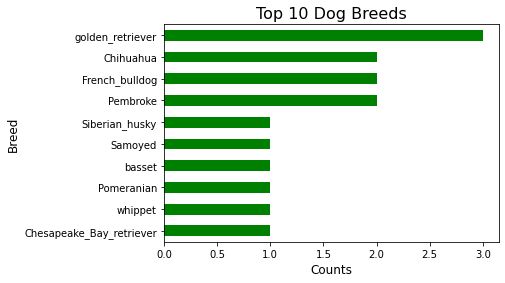

In [61]:
top_10_breeds = df['dog_type'].value_counts()[0:10].sort_values(axis=0, ascending=True)
top_10_breeds.plot(kind = 'barh', color=['green'])
plt.title('Top 10 Dog Breeds', size=16)
plt.xlabel('Counts', size=12)
plt.ylabel('Breed', size=12)
plt.savefig('top-breeds.png');

In [87]:
df['rating_numerator'].value_counts().sort_index(ascending = False)

14.0     1
13.0    13
12.0     4
Name: rating_numerator, dtype: int64

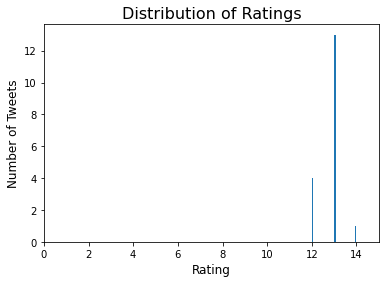

In [62]:
df['rating_numerator'].plot(kind = 'hist', bins = 30)

plt.xlim(0, 15)
plt.ylabel('Number of Tweets', fontsize = 12)
plt.xlabel('Rating', fontsize = 12)
plt.title('Distribution of Ratings', fontsize = 16)
plt.savefig('Raiting.png');

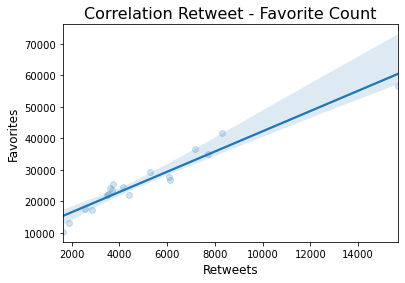

In [64]:
sns.regplot(x="retweet_count", y="favorite_count", data=df, scatter_kws={'alpha':0.2})
plt.title('Correlation Retweet - Favorite Count', size=16)
plt.xlabel('Retweets', size=12)
plt.ylabel('Favorites', size=12)
plt.savefig('Correlation.png');

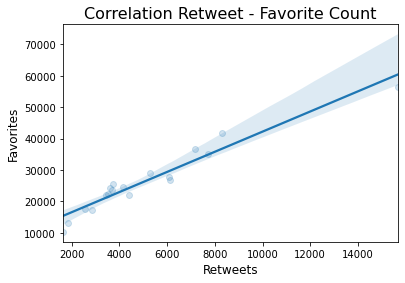

In [93]:
sns.regplot(x="retweet_count", y="favorite_count", data=df, scatter_kws={'alpha':0.2})
plt.title('Correlation Retweet - Favorite Count', size=16)
plt.xlabel('Retweets', size=12)
plt.ylabel('Favorites', size=12)
plt.savefig('Correlation.png');

In [94]:
df['rating_numerator'].corr(df['retweet_count'])

0.09651364927763147

In [95]:
stages_dog = df['stage'].value_counts()[1:5].index
sns.countplot(data = df, x = 'stage', order = stages_dog)
plt.xlabel('Dog Stage', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('The Four Stages',fontsize=16)
plt.savefig('common-stage.png');

KeyError: 'stage'

In [66]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

plt.figure(figsize=(8,6))
df.dog_stages.value_counts().sort_values(ascending=False).plot.bar()
plt.title("Popular dog stages")
plt.xticks(rotation=45)
plt.xlabel("Dog stages")
plt.ylabel("Number of dogs");

#save pic
plt.savefig('dog_stages.png')

AttributeError: 'DataFrame' object has no attribute 'dog_stages'

<Figure size 576x432 with 0 Axes>